In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

In [2]:
df = pd.read_csv('ford.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [7]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

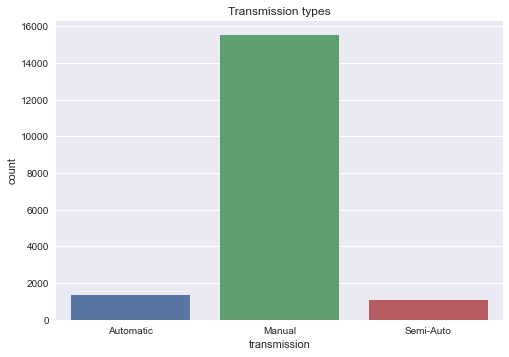

In [8]:
sns.countplot(x='transmission', data=df)
plt.title('Transmission types')
plt.show()

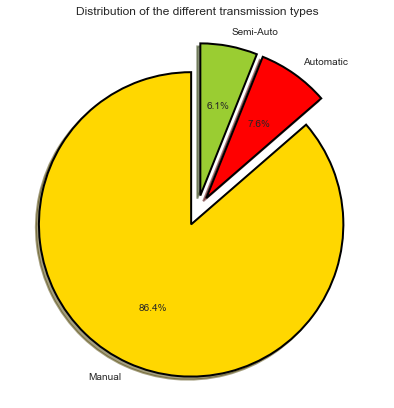

In [10]:
fig = plt.figure(figsize=(7,7))
colors = ("gold", "red", "yellowgreen")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['transmission'].value_counts()
explode= (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, 
          wedgeprops = wp, explode=explode, label='')
plt.title('Distribution of the different transmission types')
plt.show()

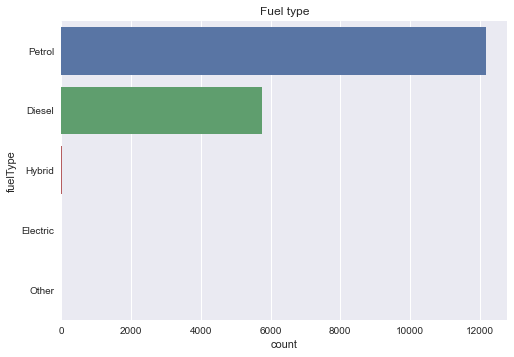

In [12]:
sns.countplot(y='fuelType', data=df)
plt.title('Fuel type')
plt.show()

In [13]:
print(df['fuelType'].value_counts())

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


In [14]:
fueltype = df['fuelType']
transmission = df['transmission']
price = df['price']

<AxesSubplot:xlabel='transmission', ylabel='price'>

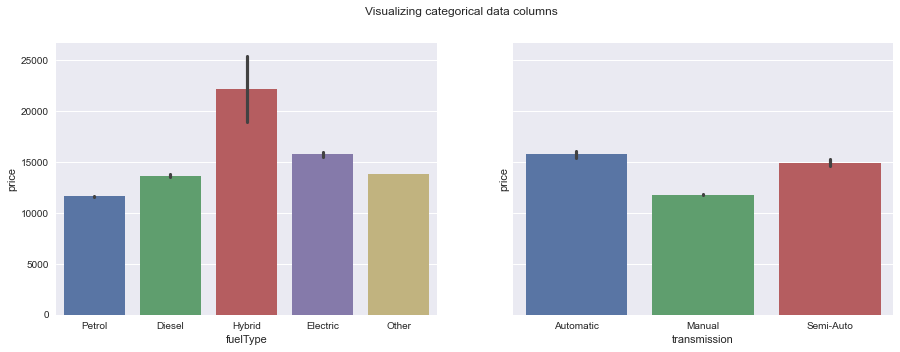

In [17]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical data columns')
sns.barplot(x=fueltype, y=price, ax = axes[0])
sns.barplot(x=transmission, y=price, ax=axes[1])

<AxesSubplot:xlabel='transmission', ylabel='price'>

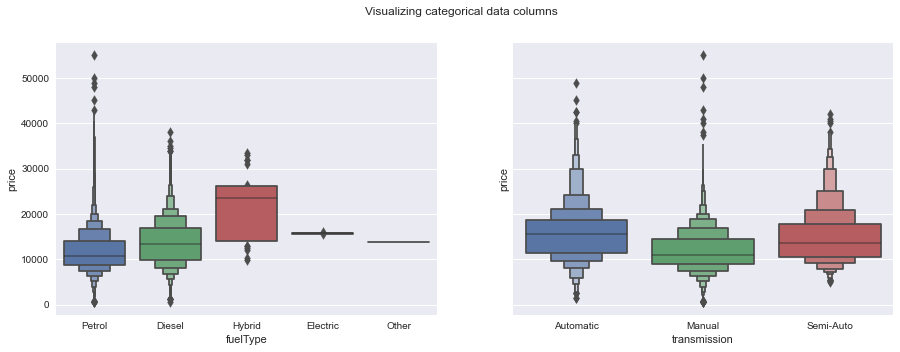

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical data columns')
sns.boxenplot(x=fueltype, y=price, ax = axes[0])
sns.boxenplot(x=transmission, y=price, ax= axes[1])

<AxesSubplot:>

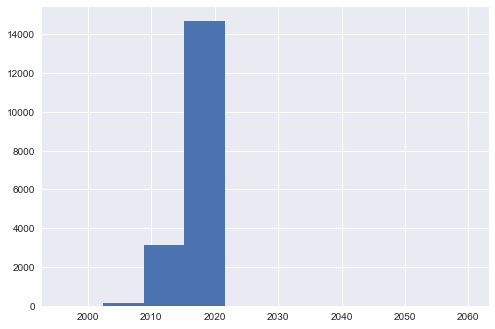

In [21]:
df['year'].hist()

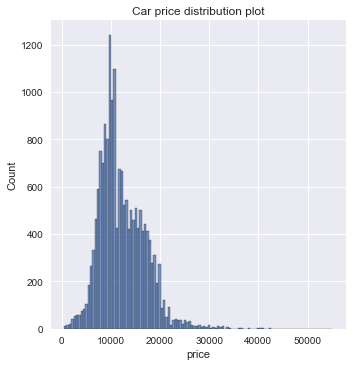

In [22]:
sns.displot(df.price)
plt.title('Car price distribution plot')
plt.show()

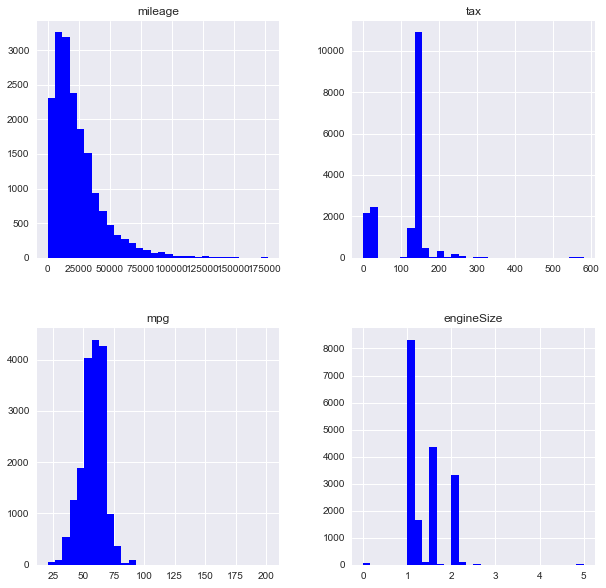

In [23]:
df[['mileage', 'tax', 'mpg', 'engineSize']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

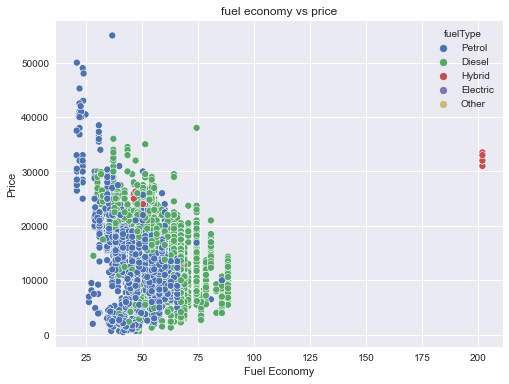

In [25]:
plt.figure(figsize=(8,6))
plt.title('fuel economy vs price')
sns.scatterplot(x=df['mpg'], y=df['price'], hue=df['fuelType'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()

In [26]:
df.replace({'transmission':{'Manual':0, 'Automatic':1, 'Semi-Auto':2}}, inplace=True)
df.replace({'fuelType':{'Petrol':0, 'Diesel':1, 'Hybrid':2, 'Electric':3, 'Other':4}}, inplace=True)

In [27]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,1,15944,0,150,57.7,1.0
1,Focus,2018,14000,0,9083,0,150,57.7,1.0
2,Focus,2017,13000,0,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,0,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,1,1482,0,145,48.7,1.0


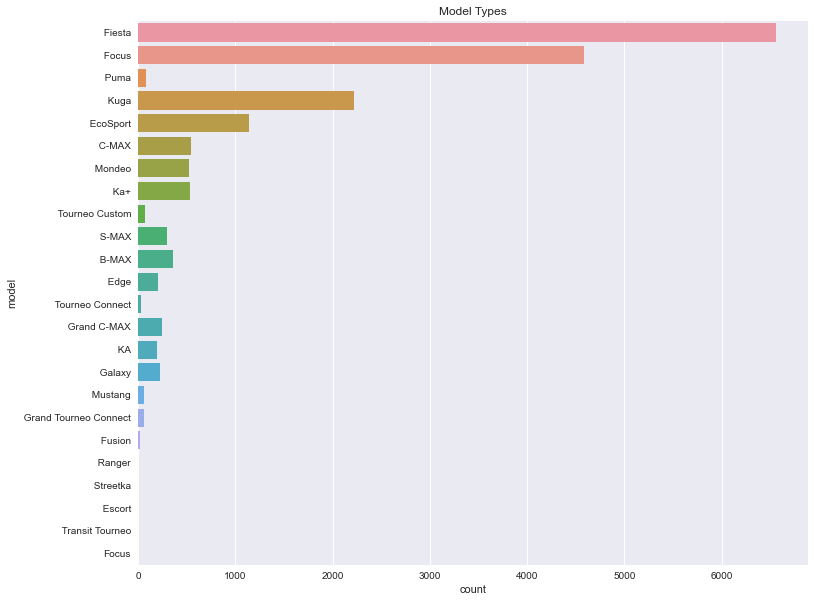

In [28]:
plt.figure(figsize=(12,10))
sns.countplot(y='model', data=df)
plt.title('Model Types')
plt.show()

In [29]:
print(df['model'].value_counts())

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64


In [30]:
modified_df = df.drop("model", axis=1)
modified_df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


In [31]:
df.corr()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
year,1.000000,0.636009,0.030939,-0.707818,-0.084931,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,0.231806,-0.530659,0.209225,0.406857,-0.346419,0.411178
transmission,0.030939,0.231806,1.000000,-0.052398,0.107760,0.158415,-0.274895,0.209293
mileage,-0.707818,-0.530659,-0.052398,1.000000,0.254271,-0.260451,0.120075,0.215035
fuelType,-0.084931,0.209225,0.107760,0.254271,1.000000,-0.130713,0.307244,0.644944
tax,0.298506,0.406857,0.158415,-0.260451,-0.130713,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,-0.274895,0.120075,0.307244,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,0.209293,0.215035,0.644944,0.184363,-0.260521,1.000000


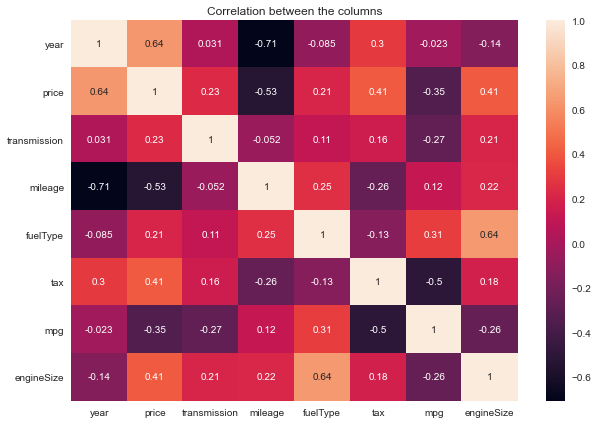

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [33]:
df.corr()['price'].sort_values()

mileage        -0.530659
mpg            -0.346419
fuelType        0.209225
transmission    0.231806
tax             0.406857
engineSize      0.411178
year            0.636009
price           1.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'Correlation between year and price'}, xlabel='price', ylabel='year'>

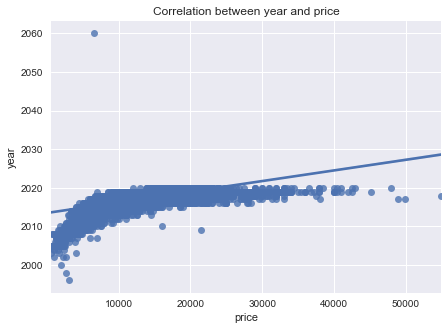

In [34]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and price')
sns.regplot(x='price', y='year', data=df)